In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import matplotlib.pyplot as plt
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from IPython.display import display
IPythonConsole.ipython_useSVG = True

In [2]:
with Chem.SDMolSupplier('./DB00027.sdf') as suppl:
    ms = [x for x in suppl if x is not None]

[20:12:44] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 50 ignored


In [3]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

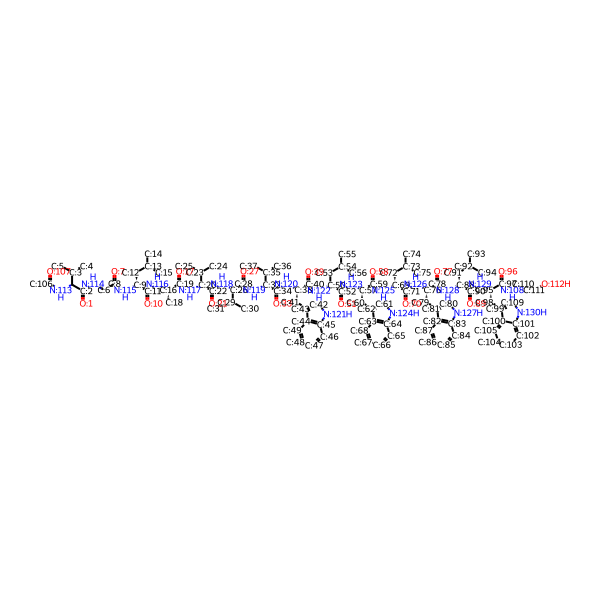

In [15]:
from PIL import Image
for m in ms:
    mol_id = m.GetProp('_Name')
    smiles = Chem.MolToSmiles(m)
    mol_with_index = mol_with_atom_index(m)

    img = Draw.MolToImage(m, size=(600, 600))
    display(img)
    img.save('mol_image.png')

In [11]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [12]:
from IPython.display import SVG

for m in ms:
    mol_id = m.GetProp('_Name')
    smiles = Chem.MolToSmiles(m)
    mol_with_index = mol_with_atom_index(m)
    SVG(moltosvg(mol_with_index))